In [11]:
# Project Report: Online Retail Recommendation System

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:

# Load the dataset
data = pd.read_excel('OnlineRetail.xlsx')


In [12]:

# Display basic information about the dataset
print("Dataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())



First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [34]:

# Step 1: Data Preprocessing

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())
plt.show()


Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [20]:

# Display column names for verification
print("\nColumn names in the dataset:", data.columns)

# Check for the presence of 'CustomerID' (correct name)
if 'CustomerID' in data.columns:
    # Drop rows with missing Customer ID
    data_cleaned = data.dropna(subset=['CustomerID'])
else:
    raise KeyError("The column 'CustomerID' is not present in the dataset. Please verify the dataset.")

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Remove rows with negative or zero quantities and unit prices
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Display the shape of the cleaned dataset
print("\nShape of cleaned dataset:", data_cleaned.shape)



Column names in the dataset: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Shape of cleaned dataset: (392692, 8)


In [21]:

# Step 2: Data Analysis

# Most popular products globally
popular_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 popular products globally:")
print(popular_products)



Top 10 popular products globally:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


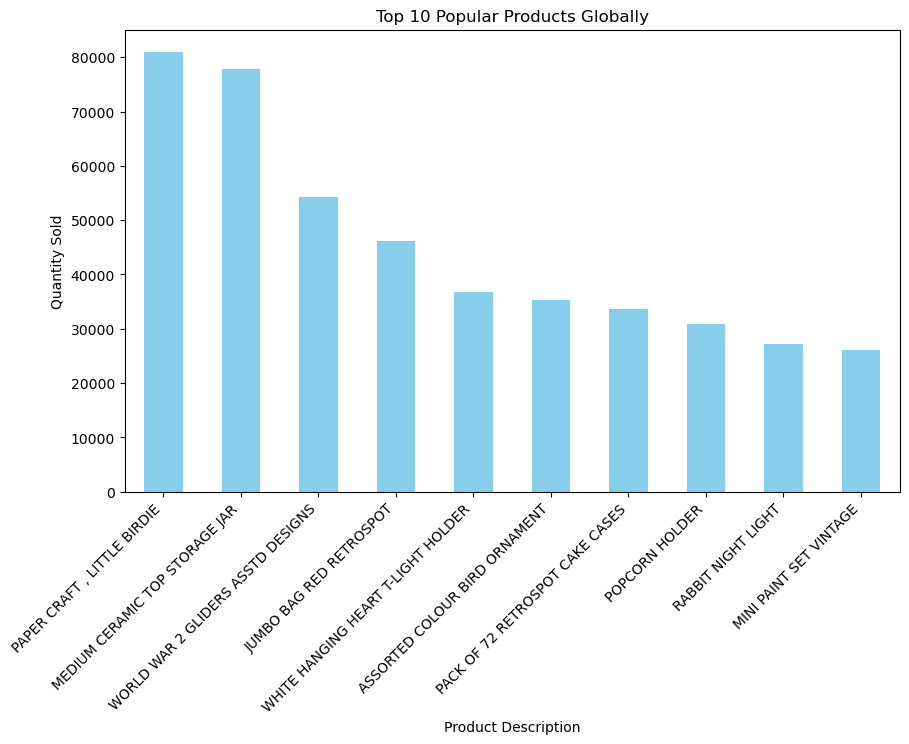

In [22]:

# Visualizing top 10 popular products globally
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Products Globally')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.show()


In [25]:

# Popular products by country
country_wise_products = data_cleaned.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
print("\nTop 5 countries with popular products:")
print(country_wise_products.sort_values(by=['Country', 'Quantity'], ascending=[True, False]).head(10))




Top 5 countries with popular products:
       Country                    Description  Quantity
287  Australia         MINI PAINT SET VINTAGE      2952
377  Australia             RABBIT NIGHT LIGHT      1884
386  Australia          RED  HARMONICA IN BOX      1704
409  Australia  RED TOADSTOOL LED NIGHT LIGHT      1344
209  Australia   HOMEMADE JAM SCENTED CANDLES      1080
123  Australia           DOLLY GIRL LUNCH BOX      1024
532  Australia             SPACEBOY LUNCH BOX       960
55   Australia          BLUE HARMONICA IN BOX       720
285  Australia           MINI JIGSAW SPACEBOY       720
13   Australia    4 TRADITIONAL SPINNING TOPS       700


In [26]:

# Monthly sales trend
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = data_cleaned.groupby('Month')['Quantity'].sum()
print("\nMonthly sales trend:")
print(monthly_sales)



Monthly sales trend:
Month
2010-12    311048
2011-01    348473
2011-02    265027
2011-03    347582
2011-04    291366
2011-05    372864
2011-06    363014
2011-07    367360
2011-08    397373
2011-09    543652
2011-10    591543
2011-11    665923
2011-12    286777
Freq: M, Name: Quantity, dtype: int64


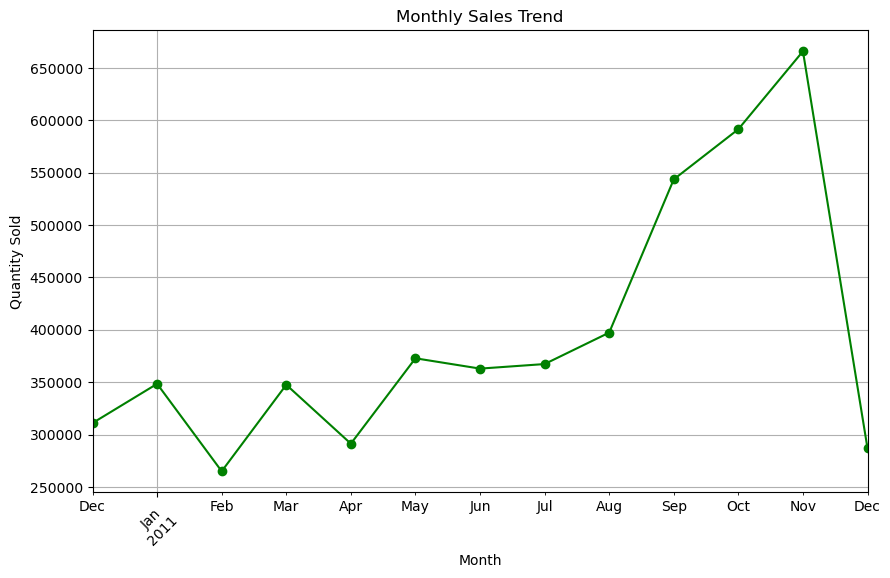

In [27]:

# Visualizing monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Quantity Sold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [28]:

# Step 3: Recommendation System

# Function to recommend popular products globally
def recommend_globally(n=5):
    return popular_products.head(n)

# Function to recommend products by country
def recommend_by_country(country, n=5):
    products = country_wise_products[country_wise_products['Country'] == country]
    return products.sort_values('Quantity', ascending=False).head(n)

# Function to recommend products by month
def recommend_by_month(month, n=5):
    monthly_data = data_cleaned[data_cleaned['Month'] == month]
    popular_monthly = monthly_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
    return popular_monthly.head(n)


In [29]:

# Test the functions
print("\nGlobal Recommendations:")
print(recommend_globally())



Global Recommendations:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
Name: Quantity, dtype: int64


In [30]:

print("\nRecommendations for the UK:")
print(recommend_by_country('United Kingdom'))



Recommendations for the UK:
              Country                         Description  Quantity
17545  United Kingdom         PAPER CRAFT , LITTLE BIRDIE     80995
17220  United Kingdom      MEDIUM CERAMIC TOP STORAGE JAR     76919
18998  United Kingdom   WORLD WAR 2 GLIDERS ASSTD DESIGNS     49086
16992  United Kingdom             JUMBO BAG RED RETROSPOT     41878
18911  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER     34630


In [31]:

print("\nRecommendations for December 2010:")
print(recommend_by_month('2010-12'))



Recommendations for December 2010:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     5139
WHITE HANGING HEART T-LIGHT HOLDER    3611
PACK OF 72 RETROSPOT CAKE CASES       3572
HAND WARMER BABUSHKA DESIGN           3341
MINI PAINT SET VINTAGE                2700
Name: Quantity, dtype: int64


In [33]:

# Step 4: Conclusion
# The project successfully developed a recommendation system for online retail data.
# Recommendations are provided globally, by country, and by month based on product popularity.

# Export cleaned data to a new file for reference
data_cleaned.to_excel('Cleaned_OnlineRetail.xlsx', index=False)

